# Test buffer elevation maps

This is a modification of ```test_load_elevation_maps.ipynb```, which successfully interpolates the rasters onto a rotated grid. The point of this routine is to nest the raster in a bigger array so that the interpolation scheme is never out of bounds.

In [1]:
import json
import fiona
import numpy as np
import pandas as pd
import scipy.signal
from IPython.display import display, HTML
import rasterio # rasterio and OGR don't mix...see rasterio docs
from rasterio import Affine
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [2]:
fdir = "F:/2017_Karen_Sandwich_maps"
#fdir = "C:/crs/proj/2017_Karen_Sandwich_maps"

fnames = (\
"2016-01-22_SandwichTNB_PT_DEM_10cm_trimmed.tif",\
"2016-01-25_SandwichTNB_DEM_10cm_trimmed.tif",\
"2016-02-11_SandwichTNB_DEM_10cm_trimmed.tif",\
"2016-03-30_SandwichTNB_AS_DEM_10cm_trimmed.tif",\
"2016-09-21_SandwichTNB_DEM_10cm_trimmed.tif",\
"2017-01-09_SandwichTNB_DEM_10cm_trimmed.tif",\
"2017-01-25_SandwichTNB_DEM_10cm_trimmed.tif",\
"2017-02-14_SandwichTNB_DEM_10cm_trimmed.tif",\
"2017-03-16_SandwichTNB_DEM_10cm_trimmed.tif",\
"2017-04-28_SandwichTNB_DEM_10cm_trimmed.tif",\
"2017-05-04_SandwichTNB_DEM_10cm_trimmed.tif",\
"2017-09-18_SandwichTNB_DEM_10cm_trimmed.tif",\
#"2018-01-03_SandwichTNB_DEM_10cm_trimmed.tif",\ # needs to be padded...not very good control
"2018-01-10_SandwichTNB_DEM_10cm_trimmed.tif",\
"DEM_10cm_selfcal_lokicampos_mid_denseNAD83UTM19.tif")

# top left corner of region of interest (UTM Zone 19N meters)
e0 = 376488.; n0 = 4625200.

# size of region in meters
xsize, ysize = 800., 680.
e1 = e0 + xsize
n1 = n0 - ysize

dslist =[]
# just read one for now (note...this reads in as a DataArray, not a DataSet)
fn = fdir+"/2016-01-22_SandwichTNB_PT_DEM_10cm_trimmed.tif"
# fn = fdir+"/2016-01-25_SandwichTNB_DEM_10cm_trimmed.tif"

da = xr.open_rasterio(fn,chunks={'band':1, 'y':6800, 'x':8000})
da = da.sel(x=slice(e0,e1), y=slice(n0,n1))
z = np.squeeze(da.values)
z[z == -32767.] = np.nan
#     if len(dslist) == 0:
#         xc = ds['x']-ds['x'].values.min()
#         yc = ds['y']-ds['y'].values.min()
#     ds['x'] = xc
#     ds['y'] = yc
#     dslist.append(ds)

<function matplotlib.pyplot.show>

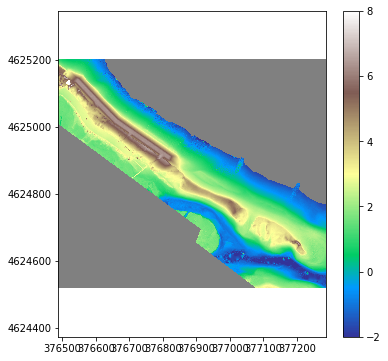

In [3]:
#plt.imshow(z)
x, y =np.meshgrid( da['x'].values, np.flip(da['y'].values,0), sparse=False, indexing='xy')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cmap=plt.cm.terrain
cmap.set_bad('grey')
plt.pcolormesh(x,y,np.flipud(z),shading='flat',edgecolor=None,cmap=cmap,vmin=-2.,vmax=8.)
plt.axis('equal')
plt.colorbar()
# ax.autoscale()
plt.show

<function matplotlib.pyplot.show>

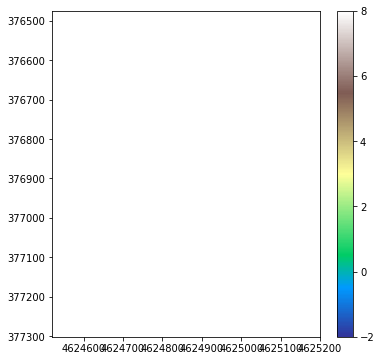

In [4]:

x, y =np.meshgrid( da['x'].values, da['y'].values, sparse=False, indexing='xy')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cmap=plt.cm.terrain
cmap.set_bad('grey')
plt.pcolormesh(y,x,z,shading='flat',edgecolor=None,cmap=cmap,vmin=-2.,vmax=8.)
plt.axis('equal')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show

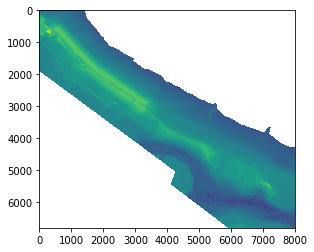

In [5]:
plt.imshow(z)

In [6]:
# look to see what got loaded
print(da['x'].values[0], da['x'].values[-1], da['y'].values[0], da['y'].values[-1])
# this is super slow and only successfully returns min and max
# print(stats.describe(da.values,nan_policy='omit'))
print(da.values.min(), da.values.max())
print(da.sizes)
print(da.dims)
print(da.indexes)
da.values

376488.092999 377287.992999 4625199.98441 4624520.08441
-32767.0 10.9024
Frozen(OrderedDict([('band', 1), ('y', 6800), ('x', 8000)]))
('band', 'y', 'x')
band: Int64Index([1], dtype='int64', name='band')
y: Float64Index([ 4625199.984410301,    4625199.8844103,  4625199.784410301,
                    4625199.6844103, 4625199.5844103005,  4625199.484410301,
                    4625199.3844103,  4625199.284410301,    4625199.1844103,
                 4625199.0844103005,
                 ...
                  4624520.984410301,    4624520.8844103,  4624520.784410301,
                    4624520.6844103, 4624520.5844103005,  4624520.484410301,
                    4624520.3844103,  4624520.284410301,    4624520.1844103,
                 4624520.0844103005],
                dtype='float64', name='y', length=6800)
x: Float64Index([  376488.092999084, 376488.19299908396,   376488.292999084,
                 376488.39299908397, 376488.49299908394,   376488.592999084,
                 376488.69299

array([[[  1.13245010e+00,   1.13137805e+00,   1.12961400e+00, ...,
          -3.27670000e+04,  -3.27670000e+04,  -3.27670000e+04],
        [  1.14447498e+00,   1.14124238e+00,   1.13775575e+00, ...,
          -3.27670000e+04,  -3.27670000e+04,  -3.27670000e+04],
        [  1.15388370e+00,   1.14859486e+00,   1.14172435e+00, ...,
          -3.27670000e+04,  -3.27670000e+04,  -3.27670000e+04],
        ..., 
        [ -3.27670000e+04,  -3.27670000e+04,  -3.27670000e+04, ...,
          -4.32202399e-01,  -4.40967351e-01,  -4.52085316e-01],
        [ -3.27670000e+04,  -3.27670000e+04,  -3.27670000e+04, ...,
          -4.17882293e-01,  -4.24693078e-01,  -4.31624860e-01],
        [ -3.27670000e+04,  -3.27670000e+04,  -3.27670000e+04, ...,
          -4.00877088e-01,  -4.04893130e-01,  -4.09540743e-01]]], dtype=float32)

In [7]:
# Create a big arrary to nest the raster into. This has to have the same dx,dy as the raster.
# 'b' stands for big (or buffer)
e0b = 376220.
n0b = 4625450.
dxyb = 0.1
enb = 377470.
nnb = 4624430.
nx = int((enb-e0b)/dxyb) + 1
ny = int((n0b-nnb)/dxyb) + 1
b = np.nan*np.ones((ny,nx))
xb = np.linspace(e0b,enb,nx)
yb = np.flip(np.linspace(nnb,n0b,ny),0)

print("Big array has shape",np.shape(b))
print("yb and xb have shapes",np.shape(yb),np.shape(xb))

Big array has shape (10201, 12501)
yb and xb have shapes (10201,) (12501,)


In [8]:
# find the index in the big array of the top left corner of the raster
#    truncate to nearest 0.1 m 
x0t = 0.1*int((np.round(10.*da['x'].values[0])))
y0t = 0.1*int((np.round(10.*da['y'].values[0])))

ib = int((x0t - e0b)/dxyb)
jb = int((n0b - y0t)/dxyb)

print(da['x'].values[0], x0t, ib, xb[ib])
print(da['y'].values[0], y0t, jb, yb[jb])

376488.092999 376488.10000000003 2681 376488.1
4625199.98441 4625200.0 2500 4625200.0


In [9]:
# place the raster in the big array
print("Shape of da: ",np.shape(np.squeeze(da.values)))
print("Shapes of da['y'] and da['x']",np.shape(da['y'].values),np.shape(da['x'].values))
nyr, nxr = np.shape(np.squeeze(da.values))
print(nyr,nxr)
print('x indices:',ib, ib+nxr)
print('y indices:',jb, jb+nyr)
print("Shape of b: ",np.shape(b)," , shape of b subset: ",np.shape(b[ jb:jb+nxr, ib:ib+nyr ]))

Shape of da:  (6800, 8000)
Shapes of da['y'] and da['x'] (6800,) (8000,)
6800 8000
x indices: 2681 10681
y indices: 2500 9300
Shape of b:  (10201, 12501)  , shape of b subset:  (7701, 6800)


In [10]:
a = np.zeros((25,20))
print(np.shape(a))
print(np.shape(a[5:10,3:3+3]))

(25, 20)
(5, 3)


In [11]:
from scipy import interpolate
print( np.shape(np.flipud(da['y'].values)), np.shape(da['x'].values), np.shape( np.flipud(da.values)) )
x = da['x'].values
y = np.flipud(da['y'].values)
# Not sure how da.values got a singleton dimension, but squeeze gets rid of it.
# However, make sure to squeeze before flipping
z = np.flipud(np.squeeze(da.values))

# smooth with 2D running median
zs = scipy.signal.medfilt2d(z, kernel_size=3)

print(np.shape(x),np.shape(y),np.shape(zs))
f = interpolate.RegularGridInterpolator( (y, x), zs, method='nearest')

(6800,) (8000,) (1, 6800, 8000)
(8000,) (6800,) (6800, 8000)


In [12]:
# make a small box w/ 0.5m grid
dxy = 0.5
xmax = 200.
ymax = 2400.
nx = int((1./dxy)*xmax) + 1
ny = int((1./dxy)*ymax) + 1
xrot, yrot=np.meshgrid(np.linspace(0.,xmax,nx), np.flip(np.linspace(0.,ymax,ny),0) ,sparse=False, indexing='xy')
print(xrot.shape)
xrot
print(yrot.shape)
yrot

(4801, 401)
(4801, 401)


array([[  2.40000000e+03,   2.40000000e+03,   2.40000000e+03, ...,
          2.40000000e+03,   2.40000000e+03,   2.40000000e+03],
       [  2.39950000e+03,   2.39950000e+03,   2.39950000e+03, ...,
          2.39950000e+03,   2.39950000e+03,   2.39950000e+03],
       [  2.39900000e+03,   2.39900000e+03,   2.39900000e+03, ...,
          2.39900000e+03,   2.39900000e+03,   2.39900000e+03],
       ..., 
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  5.00000000e-01,   5.00000000e-01,   5.00000000e-01, ...,
          5.00000000e-01,   5.00000000e-01,   5.00000000e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [13]:
# calculate UTM coordinates for the box, which depend on upper left hand corner and rotation

# top left corner of big region of interest (UTM Zone 19N meters)
e0 = 376300.; n0 = 4625250.
rot = 110.
def box2UTM(x, y, e0, n0, rot):
    r = np.pi*(rot-90.)/180.
    xnew = x*np.cos(r)   + y*np.sin(r) + e0
    ynew = -y*np.sin(r)  + x*np.cos(r) + n0
    return xnew, ynew

xu, yu = box2UTM(xrot, yrot, e0, n0, rot)

print('Data box:')
print(da['x'].values.min(), da['x'].values.max(), da['y'].values.min(), da['y'].values.max())
print('Interp. box:')
print(np.min(xu),np.max(xu),np.min(yu),np.max(yu))

xb, yb = np.array((xrot.min(),xrot.min(),xrot.max(),xrot.max())), np.array((yrot.min(),yrot.max(),yrot.min(),yrot.max()))
xub, yub = box2UTM(xb, yb, e0, n0, 120.)
fid = open('box_corners.txt','w')
for i in range(0,4):
    fid.write('{0:}, {1:}\n'.format( xub[i],yub[i]))
fid.close()

Data box:
376488.092999 377287.992999 4624520.08441 4625199.98441
Interp. box:
376300.0 377308.786868 4624429.15166 4625437.93852


In [14]:
#plt.scatter(xu, yu, marker='.')

In [15]:
from scipy import interpolate
print( np.shape(np.flipud(da['y'].values)), np.shape(da['x'].values), np.shape( np.flipud(da.values)) )
x = da['x'].values
y = np.flipud(da['y'].values)
# Not sure how da.values got a singleton dimension, but squeeze gets rid of it.
# However, make sure to squeeze before flipping
z = np.flipud(np.squeeze(da.values))
print(np.shape(x),np.shape(y),np.shape(z))
f = interpolate.RegularGridInterpolator( (y, x), z, method='linear')

(6800,) (8000,) (1, 6800, 8000)
(8000,) (6800,) (6800, 8000)


In [16]:
# z[z<=-100.]=np.NaN
# plt.pcolormesh(x,y,z)
# plt.colorbar()

In [17]:
zi = f((yu,xu))
zi[zi<=-100.]=np.NaN

ValueError: One of the requested xi is out of bounds in dimension 0

In [ ]:
plt.plot(figsize=(2,8))
plt.pcolormesh(yrot,xrot,zi,cmap=plt.cm.terrain,vmin=-2,vmax=8)
#plt.gca().invert_yaxis()
plt.axis('equal')
plt.colorbar()

In [ ]:
print(np.shape(zi))
plt.plot(zi[101,:])